In [1]:
import pandas as pd
import networkx as nx
import random

df = pd.read_csv('reddit_comments.csv') 
df['parent_id'] = df['parent_id'].str.slice(3) 

nodes = pd.read_csv('nodes.csv', index_col=False)
edges = pd.read_csv('edges.csv', index_col=False)


author = 'author' #id
parent_author = 'parent_author' #id padre commento

print("Totale nodi = ",len(nodes))
print("Torale righe/archi = ",len(edges))

df.head(3)

Totale nodi =  49885
Torale righe/archi =  49885


,date,clean_text,parent_id,id,author,created_utc,num_comments,score,type,parent_author
0,26/12/2022,well yes its putting out more and more pc wish...,mf78,j1rg7ow,-----fuck-----,1672086947,NaN,1,comment,omgpop
1,28/12/2022,gifgiphy,x2u1,j1xj2cx,---LefeverDream---,1672197350,NaN,1,comment,SpaceNigiri
2,26/12/2022,milli vanilli,sww6,j1oak8n,---nom---,1672018544,NaN,1,comment,MsolProd


In [2]:
G = nx.DiGraph()
G = nx.from_pandas_edgelist(edges, source = 'author', target = 'parent_author', create_using = nx.DiGraph())
G.add_nodes_from(nodes)

#G.remove_edges_from(nx.selfloop_edges(G)) #Eliminazione dei self loop

print(G)

DiGraph with 13171 nodes and 40948 edges


In [3]:
G = nx.DiGraph()
G = nx.from_pandas_edgelist(edges, source = 'author', target = 'parent_author', create_using = nx.DiGraph())
G.add_nodes_from(nodes)

#G.remove_edges_from(nx.selfloop_edges(G)) #Eliminazione dei self loop

print(G)

DiGraph with 13171 nodes and 40948 edges


## Community discovery

In [4]:
import cdlib
from cdlib import algorithms
from cdlib import evaluation
G_ind = G.to_undirected()

/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Note: to be able to use all crisp methods, you need to install some additional packages:  {'graph_tool'}


## Louvain

In [5]:
from cdlib import algorithms
import networkx as nx
from cdlib import viz
from cdlib import evaluation

In [24]:
coms_louvain = algorithms.louvain(G_ind, resolution=2)

In [25]:
coms_louvain.communities

[['hi_there_bitch',
  'patate_russe',
  'jimmy011087',
  'frequenttimetraveler',
  '0xmerkle',
  '12apor',
  '1dolinski',
  '1imy',
  '1nventioning',
  '3141592653589793230',
  'Golfishe',
  '4n3ver',
  '4ndr01d5',
  '7xmxni',
  'thedaklad',
  '8andage',
  'aamir21khan2002',
  'Shiini18',
  'Virtual_Theory_5836',
  'Boris_Ivanovski',
  'Crusty_Shart',
  'ZenManifold',
  'AbstractQbit',
  'i_did_ur_mom_AMA',
  'AccidentNo3143',
  'Accomplished-Line69',
  'highestshroom',
  'Accurate-Wrongdoer-9',
  'Ace-0f_Spikes',
  'Pointless_Porcupine',
  'acyiz',
  'AdaptivePath',
  'mcmcst',
  'AdriftandUncertain',
  'wprooster',
  'jadenedaj',
  'cpalmtv',
  'itdonotmatter_',
  'Radoslawo',
  'Aevum__',
  'After_Owl6962',
  'Agreeable_Ad591',
  'Ahmed_heshamm',
  'lycheedorito',
  'Altruistic-Ad-2736',
  'AlwaysALighthouse',
  'Ambitious-Knee9644',
  'Amracool',
  'EliteNugget69',
  'NeverGiveCups',
  'Anathematized1',
  'bruh56jegwj',
  'andyleenz',
  'TheLordOfTheWings',
  'angeismyname',
  'Sig

In [26]:
con_louvain = evaluation.conductance(G_ind,coms_louvain)
con_louvain

FitnessResult(min=0.0, max=0.6533018867924528, score=0.1166431563350476, std=0.22048874997231707)

In [27]:
internal_edge_density=evaluation.internal_edge_density(G_ind,coms_louvain)
internal_edge_density

FitnessResult(min=0, max=3.0, score=0.46140256483650055, std=0.590987707724967)

In [28]:
coms_louvain.node_coverage # Percentage of nodes covered by the clustering

1.0

In [29]:
coms_louvain.overlap

False

In [30]:
coms_louvain.method_parameters

{'weight': 'weight', 'resolution': 2, 'randomize': None}

In [31]:
len(coms_louvain.communities)

383

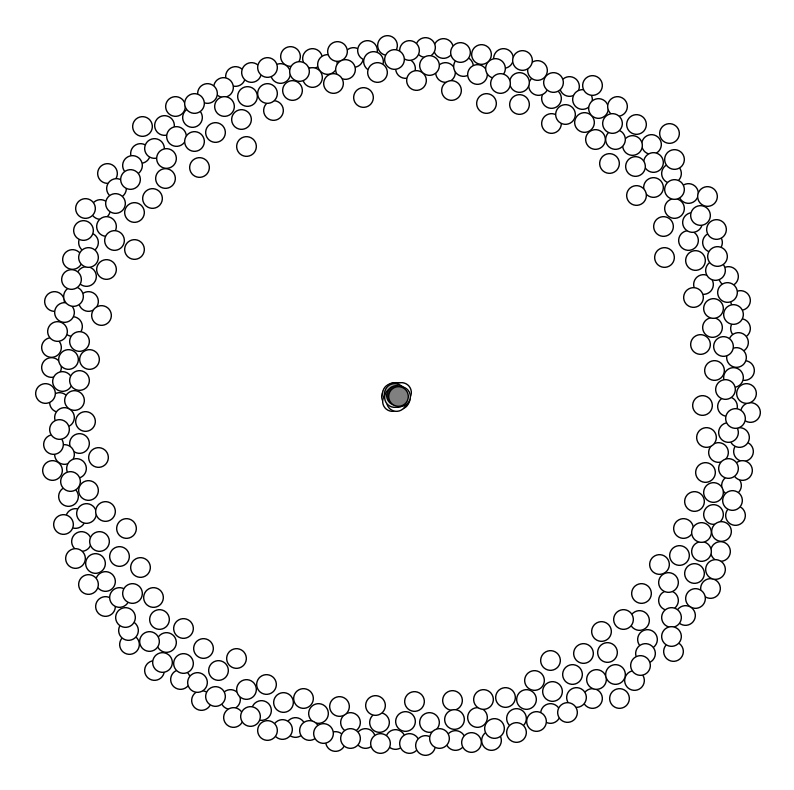

In [47]:
viz.plot_community_graph(G_ind, coms_louvain, figsize=(10, 10))

## Leiden

In [32]:
coms_leiden = algorithms.leiden(G_ind)

In [33]:
coms_leiden.communities

[['--lolwutroflwaffle--',
  'bilbobeenus34',
  'mus3man42',
  'Lord_Skellig',
  'WalkProfessional8969',
  'Tinsnow1',
  'fulis',
  'xenomorph856',
  '-HesitatingBeauty',
  'cristiano-potato',
  'synexo',
  'kamus10',
  '-JG-77-',
  'sneed_capital_group',
  'Fit-Meet1359',
  'ai_will_destroy_us',
  'yaosio',
  '3_layers_deep',
  '-paul-',
  'BuonoVibes',
  'ErectricCars2',
  '-RichardCranium-',
  'Sophira',
  'gcruzatto',
  'Killingagency',
  'DanPreacher',
  'JackCrainium',
  '-Speechless',
  'totally_up_to_it',
  'DraconicLegacy',
  'no-name-here',
  'cold-flame1',
  '-what-just-happened-',
  'goofandaspoof',
  '-ZeroRelevance-',
  'InSearchOfUpdog',
  'CYHSM',
  'LukeChriswalker',
  'trg1408',
  '00matchup',
  'wintermutt',
  'uselesssurprise',
  'ken81987',
  'sigterm666',
  'Ihaveamodel3',
  'abloblololo',
  'KimchiMaker',
  'Middle-Scene-731',
  '100dude',
  'UnnamedAlt',
  'NoMeatFingering',
  'MrHi_VEVO',
  '1978Pinto',
  'Traveltracks',
  '1will2000will1',
  'post-death_wave_co

In [34]:
con_leiden = evaluation.conductance(G_ind,coms_leiden)
con_leiden

FitnessResult(min=0.0, max=0.5266546484676796, score=0.04653648817340147, std=0.13768633317611398)

In [35]:
coms_leiden.node_coverage # Percentage of nodes covered by the clustering

1.0

In [36]:
internal_edge_density=evaluation.internal_edge_density(G_ind,coms_leiden)
internal_edge_density

FitnessResult(min=0, max=3.0, score=0.5280036640301871, std=0.6046890282969388)

In [37]:
coms_leiden.overlap

False

In [38]:
coms_leiden.method_parameters

{'initial_membership': None, 'weights': None}

In [39]:
len(coms_leiden.communities)

335

## External Evaluation

In [40]:
evaluation.overlapping_normalized_mutual_information_LFK(coms_louvain,coms_leiden)

MatchingResult(score=0.8379164138156643, std=None)

In [41]:
evaluation.f1(coms_louvain,coms_leiden)

MatchingResult(score=0.8152207792207793, std=0.3483422940929486)

## Demon

In [14]:
com_demo = algorithms.demon(G_ind, min_com_size=3, epsilon=0.25)

In [15]:
com_demo.communities

[['-Hyperion88-',
  '-doomrah-',
  '2020button',
  '27CF',
  '3DPianiat',
  '3_layers_deep',
  '3xplo',
  '420BigDawg_',
  'ABtestaquisitor',
  'AFruitShopOwner',
  'Acceptable-Cress-374',
  'Acrobatic_Hippo_7312',
  'Agreeable_Ad591',
  'Ah_Q',
  'Akeyl_Elwynn',
  'AlAv812',
  'AlternativeCharge160',
  'AngelLeliel',
  'Any-Competition-7010',
  'Aurelius_Red',
  'Avocado_Express',
  'Aware-Camera-8106',
  'Az0r_',
  'B0bbyV',
  'BaCaDaEa',
  'BenzeneBro',
  'BernhardRordin',
  'Boson40',
  'Boz001',
  'BrandonTWY',
  'BroadbandEng',
  'Broxzier',
  'BtotheTM',
  'Bush_did_PearlHarbor',
  'CarlPeligro',
  'ChiaraStellata',
  'ChronoPsyche',
  'Chumphy',
  'Cine81',
  'ClinicalIllusionist',
  'CoBPEZ',
  'Comfortable-Chef56',
  'ConObs62',
  'CosmicOzone',
  'CrashCrashDummy',
  'CrimsonPilgrim',
  'Crisis_Averted',
  'Cudos123',
  'Current-Judge',
  'Curtisg899',
  'Dachannien',
  'Dalmahr',
  'DarkSideOfGrogu',
  'DerWeltenficker',
  'Designer_Exam2548',
  'DetailNo9969',
  'Dharmist'

In [16]:
con_demo = evaluation.conductance(G_ind,com_demo)
con_demo

FitnessResult(min=0.4444444444444444, max=0.9420600858369099, score=0.8512482987328658, std=0.06577504278749019)

In [17]:
com_demo.node_coverage # Percentage of nodes covered by the clustering

0.1718927947764027

In [18]:
internal_edge_density=evaluation.internal_edge_density(G_ind,com_demo)
internal_edge_density

FitnessResult(min=0.021709252515524524, max=0.8333333333333334, score=0.1090480071253062, std=0.13944911238068575)

In [19]:
com_demo.method_parameters

{'epsilon': 0.25, 'min_com_size': 3}

In [20]:
com_demo.overlap

True

In [21]:
len(com_demo.communities)

110

## k-cliques

In [6]:
coms_k = algorithms.kclique(G_ind, k=3)

In [7]:
coms_k.communities

[['Abu2ar3a',
  'Magalex_8',
  'Psychological-Yak776',
  'tenhourguy',
  'geigenmusikant',
  'Die_Rich',
  'AdaptivePath',
  'highestshroom',
  '_R_Daneel_Olivaw',
  '_Devils_Advocat_',
  'JamesButlin',
  'ithinkoutloudtoo',
  'crowbayashi',
  'conidig',
  'Joshiewowa',
  '22022020',
  'decixl',
  'Accomplished-Line69',
  'GoatAlone',
  '0xmerkle',
  'KushMasterKing',
  'kauefr',
  'cold-flame1',
  'liesonmars',
  'DororoFlatchest',
  'zblocker',
  'Profanion',
  '7lick',
  'masterstarfish',
  'fredlafrite',
  '-_1_2_3_-',
  'KingdomCrown',
  'PriceAffectionate830',
  'microwaved_goldfish',
  'CleanThroughMyJorts',
  'JacksonWallop',
  'Rhannmah',
  'Wonderful_Winter_734',
  'planet_oregon',
  'sthagar',
  'ungoogleable',
  'Professor__Chaos__',
  'JiffyLube953',
  'Postbreak_KQM',
  'JVM_',
  'gtj',
  'Oct_opus',
  'severe_009',
  'bobbuttlicker',
  'Chalupa_89',
  'gamesitwatch',
  'Butterbacke71',
  'FuckRedditIShit',
  'GLaDOSexe',
  'VeryExhaustedCoffee',
  'MoneyPowerNexis',
  '1

In [8]:
len(coms_k.communities)

602

In [9]:
coms_k.node_coverage # Percentage of nodes covered by the clustering

0.21828259053982232

In [10]:
internal_edge_density=evaluation.internal_edge_density(G_ind,coms_k)
internal_edge_density

FitnessResult(min=0.006025577963600591, max=2.0, score=1.175803660059371, std=0.27216192142526213)

In [11]:
coms_k.overlap

True

In [12]:
coms_k.method_parameters

{'k': 3}

In [13]:
cond_k = evaluation.conductance(G_ind,coms_k)
cond_k

FitnessResult(min=0.3333333333333333, max=0.9933993399339934, score=0.8660444971645945, std=0.0991941465483133)

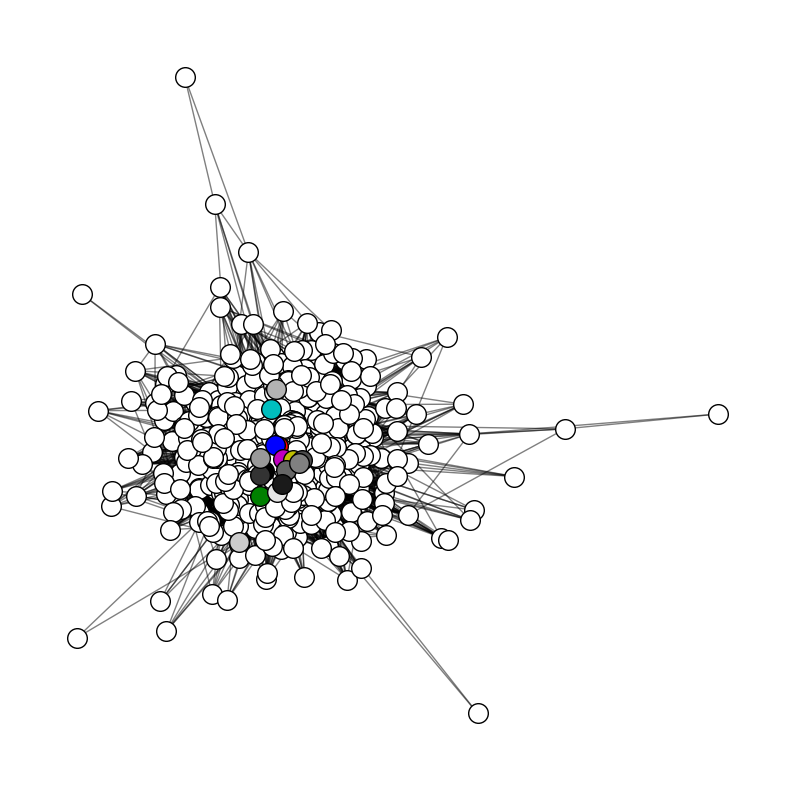

In [46]:
viz.plot_community_graph(G_ind, coms_k, figsize=(10, 10))

## External evaluation

In [22]:
evaluation.overlapping_normalized_mutual_information_LFK(com_demo,coms_k)

MatchingResult(score=0.054339274604543686, std=None)

In [23]:
evaluation.f1(com_demo,coms_k)

MatchingResult(score=0.0758, std=0.18201197762784735)

## Graphic comparison

In [42]:
from cdlib import viz

<Axes: xlabel='Algorithm', ylabel='conductance'>

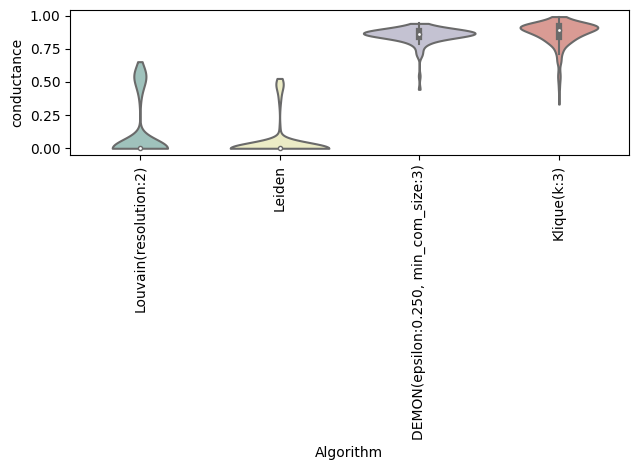

In [43]:
viz.plot_com_stat([coms_louvain, coms_leiden, com_demo, coms_k], evaluation.conductance)

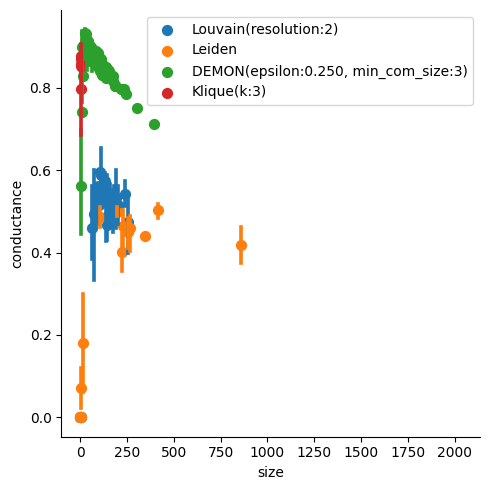

In [44]:
viz.plot_com_properties_relation( [coms_louvain, coms_leiden, com_demo, coms_k], evaluation.size, evaluation.conductance)

## Other comparison

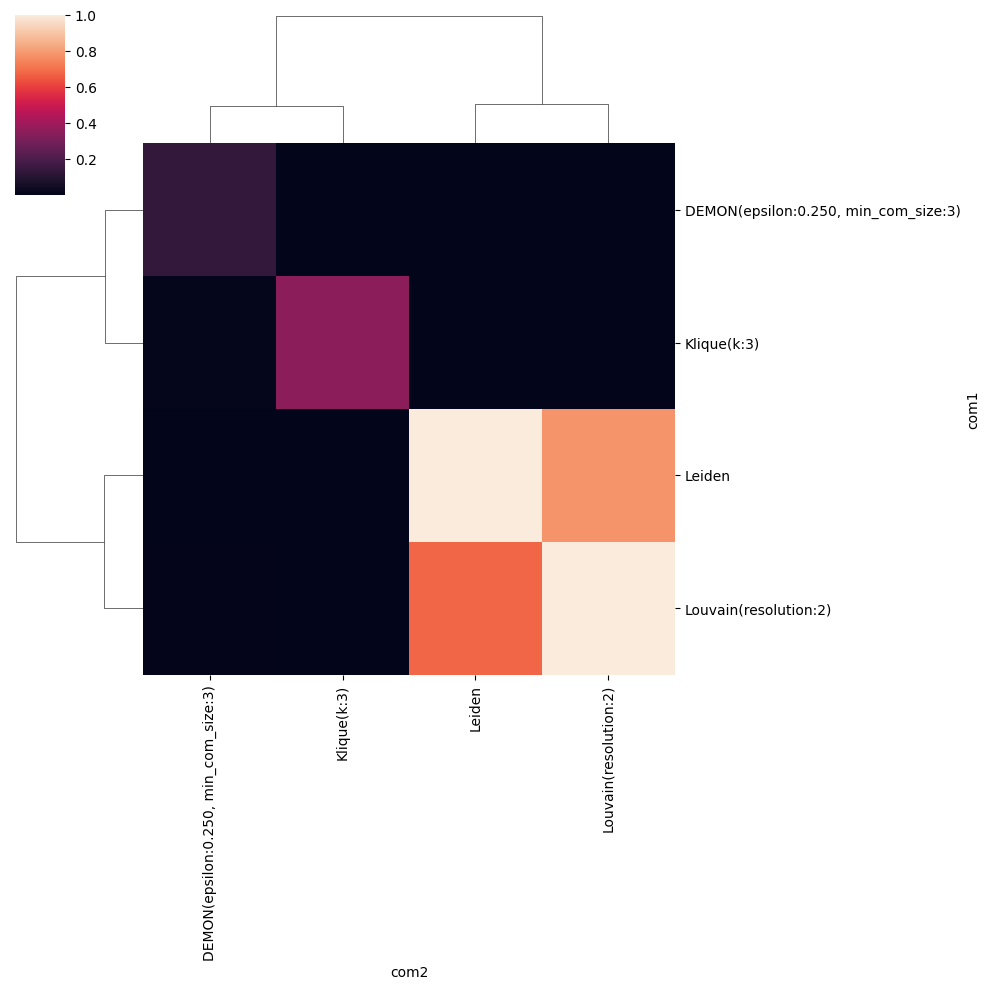

In [45]:
viz.plot_sim_matrix([coms_louvain, coms_leiden, com_demo, coms_k], evaluation.nf1)